In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('spi_matches.csv')

In [ ]:
season=data[data ['season']==2022]

In [ ]:
league= season[season ['league']==

SyntaxError: ignored

In [ ]:
print(data['league'].unique())

["FA Women's Super League" 'French Ligue 1' 'Barclays Premier League'
 'Spanish Primera Division' 'Italy Serie A' 'German Bundesliga'
 'UEFA Champions League' 'Mexican Primera Division Torneo Clausura'
 'Major League Soccer' 'Swedish Allsvenskan' 'Norwegian Tippeligaen'
 "National Women's Soccer League" 'Brasileiro Série A'
 'Russian Premier Liga' 'Mexican Primera Division Torneo Apertura'
 'Austrian T-Mobile Bundesliga' 'Swiss Raiffeisen Super League'
 'French Ligue 2' 'German 2. Bundesliga' 'English League Championship'
 'Scottish Premiership' 'Portuguese Liga' 'Dutch Eredivisie'
 'Turkish Turkcell Super Lig' 'Spanish Segunda Division' 'Italy Serie B'
 'Argentina Primera Division' 'UEFA Europa League' 'United Soccer League'
 'Danish SAS-Ligaen' 'Belgian Jupiler League' 'Chinese Super League'
 'Japanese J League' 'English League One'
 'South African ABSA Premier League' 'English League Two'
 'Greek Super League' 'Australian A-League' 'NWSL Challenge Cup'
 'UEFA Europa Conference Leagu

In [ ]:
def league (name):
    league_= data[data['league']==name]
    num_season = league_['season'].max()
    season= league_[league_['season']==num_season]
    return season

In [ ]:
def team(name):
    team1_= data[data['team1']==name]
    team2_= data[data['team2']==name]
    num_season = team1_['season'].max()
    season1= team1_[team1_['season']==num_season]
    season2= team2_[team2_['season']==num_season]
    return pd.concat([season1, season2], axis=0)

In [ ]:
league1= league ('FA Women\'s Super League')
league1['team1'].unique ()

array(['Manchester United Women', 'Aston Villa', 'Everton Ladies',
       'Tottenham Women', 'Arsenal Women', 'Brighton & Hove Albion',
       'West Ham United Ladies', 'Chelsea FC Women', 'Birmingham City',
       'Reading', 'Leicester City WFC', 'Manchester City Women'],
      dtype=object)

In [ ]:
def scored(df):
    team_name= df['team1'].mode()[0]
    
    team1_= df[df['team1']==team_name]
    score1= team1_['score1'].sum()
    
    team2_= df[df['team2']==team_name]
    score2= team2_['score2'].sum()
    
    return (score1+score2)/df.shape[0]

In [ ]:
def concede(df):
    team_name= df['team1'].mode()[0]
    
    team1_= df[df['team1']==team_name]
    score1= team1_['score2'].sum()
    
    team2_= df[df['team2']==team_name]
    score2= team2_['score1'].sum()
    
    return (score1+score2)/df.shape[0]

In [ ]:
from scipy.stats import poisson

In [ ]:
def goal_dist(mean, num_goals):
    ones= np.ones((num_goals+1,num_goals+1))
    goals= np.linspace(0,num_goals,num_goals+1)
    return poisson.pmf(ones*goals, mean)

In [ ]:
def match_dist(team_one, team_two):
    goals=10
    show=7
    team1=team(team_one)
    team2=team(team_two)
    
    team1_scored= scored(team1)
    team1_concede= concede(team1)

    team2_scored= scored(team2)
    team2_concede= concede(team2)
    
    team1_scored_dist=goal_dist(team1_scored, goals)
    team1_concede_dist=goal_dist(team1_concede, goals)

    team2_scored_dist=goal_dist(team2_scored, goals)
    team2_concede_dist=goal_dist(team2_concede, goals)
    
    team1_score= np.diagonal(team1_scored_dist*(team2_concede_dist.T))
    team1_score=team1_score/sum(team1_score)
    team2_score= np.diagonal(team2_scored_dist*(team1_concede_dist.T))
    team2_score=team2_score/sum(team2_score)
    
    ones=np.ones((goals+1,goals+1))
    team1_ones= ones*team1_score
    team2_ones=ones*team2_score
    goals_dist=team1_ones*team2_ones.T
    
    disp= goals_dist[:show, :show]
    team1_win= np.triu(goals_dist,1).sum()*100
    draw= np.trace(goals_dist)*100
    team2_win= np.tril(goals_dist,-1).sum()*100
    print (team_one,': ', team1_win)
    print ('Draw: ', draw)
    print (team_two,': ',team2_win)

    color=sns.color_palette("Greens", as_cmap=True)
    sns.heatmap(disp*100, cmap=color, annot= True, fmt='.1f', cbar= False)
    
    plt.xlabel(team_one)
    plt.ylabel(team_two)

Leicester City WFC :  3.274121392488447
Draw:  21.146425067229636
Chelsea FC Women :  75.5794535402819


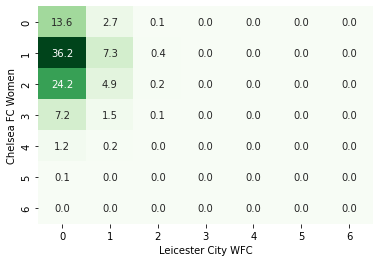

In [ ]:
match_dist('Leicester City WFC', 'Chelsea FC Women')

Brighton & Hove Albion :  25.19094741202862
Draw:  39.53490254987406
West Ham United Ladies :  35.27415003809739


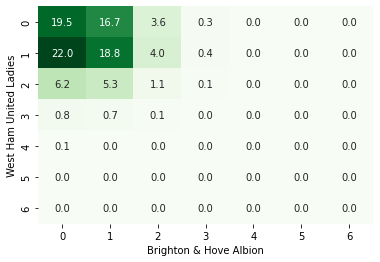

In [ ]:
match_dist('Brighton & Hove Albion', 'West Ham United Ladies')